<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Sprint Objective
Understand the differences and applications of the following recurrent layers in Keras:

SimpleRNN

GRU (Gated Recurrent Unit)

LSTM (Long Short-Term Memory)

ConvLSTM2D

In [2]:
# 1. Preparing environment
!pip install tensorflow

In [3]:
# 2.Dataset Selection
from keras.datasets import imdb

###3. Model Implementations
####SimpleRNN

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))  # Try different units like 64, 128, etc.
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.5417 - loss: 0.6841 - val_accuracy: 0.6900 - val_loss: 0.5896
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 124ms/step - accuracy: 0.6933 - loss: 0.5915 - val_accuracy: 0.6142 - val_loss: 0.6761
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.7458 - loss: 0.5154 - val_accuracy: 0.6776 - val_loss: 0.6031


###GRU

In [5]:
from keras.layers import GRU
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

###LSTM

In [6]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

###ConvLSTM2D

In [26]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, BatchNormalization, Dense, Flatten, Conv3D
import numpy as np

# Generate toy data: (samples, time_steps, rows, cols, channels)
X_train = np.random.random((100, 10, 64, 64, 1))
y_train = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                     input_shape=(10, 64, 64, 1),
                     padding='same', return_sequences=True)) # Set return_sequences to True
model.add(BatchNormalization())
model.add(Conv3D(filters=1, kernel_size=(3, 3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=5, epochs=2)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.5906 - loss: 2.4470
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.7448 - loss: 0.5038


####Training and comparing accuracy/validation loss for all 4.

####Dataset Choices
For SimpleRNN, GRU, and LSTM: Use the IMDB Sentiment Analysis dataset (text classification).

For ConvLSTM2D: Use synthetic video-like data, as ConvLSTM2D is designed for spatio-temporal sequences.

###Set-Up & Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, GRU, LSTM, ConvLSTM2D, BatchNormalization, Flatten
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import plot_model

In [10]:
max_features = 10000  # Only consider top 10k words
maxlen = 500          # Cut texts after 500 words
batch_size = 64
epochs = 3

# Load and preprocess the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

## Model Definitions

In [12]:
# Simple_rnn
def build_simple_rnn():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# GRU
def build_gru():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(GRU(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# LSTM
def build_lstm():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# ConvLSTM2D (Synthetic Data)
def build_convlstm():
    model = Sequential()
    model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                         input_shape=(10, 64, 64, 1),
                         padding='same', return_sequences=False))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Generate toy video data for ConvLSTM2D
X_conv = np.random.random((100, 10, 64, 64, 1))
y_conv = np.random.randint(2, size=(100, 1))
X_conv_test = np.random.random((20, 10, 64, 64, 1))
y_conv_test = np.random.randint(2, size=(20, 1))


###Train Models & Collect Results

In [13]:
results = {}

# Train SimpleRNN
model_rnn = build_simple_rnn()
hist_rnn = model_rnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
results['SimpleRNN'] = model_rnn.evaluate(x_test, y_test), hist_rnn.history

# Train GRU
model_gru = build_gru()
hist_gru = model_gru.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
results['GRU'] = model_gru.evaluate(x_test, y_test), hist_gru.history

# Train LSTM
model_lstm = build_lstm()
hist_lstm = model_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
results['LSTM'] = model_lstm.evaluate(x_test, y_test), hist_lstm.history

# Train ConvLSTM2D
model_convlstm = build_convlstm()
hist_convlstm = model_convlstm.fit(X_conv, y_conv, batch_size=5, epochs=epochs, validation_split=0.2)
results['ConvLSTM2D'] = model_convlstm.evaluate(X_conv_test, y_conv_test), hist_convlstm.history


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 160ms/step - accuracy: 0.5799 - loss: 0.6609 - val_accuracy: 0.6932 - val_loss: 0.5796
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 140ms/step - accuracy: 0.7847 - loss: 0.4695 - val_accuracy: 0.8104 - val_loss: 0.4403
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 147ms/step - accuracy: 0.8975 - loss: 0.2578 - val_accuracy: 0.8102 - val_loss: 0.4622
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8114 - loss: 0.4607
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 349ms/step - accuracy: 0.6613 - loss: 0.5914 - val_accuracy: 0.8508 - val_loss: 0.3508
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 334ms/step - accuracy: 0.8872 - loss: 0.2839 - val_accuracy: 0.8646 - val_loss: 0.3352
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 331ms/step - accuracy: 0.9176 - loss: 0.2138 - val_accuracy: 0.8670 - val_loss: 0.3495
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8624 - loss: 0.3637
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.3152 - loss: 2.6072 - val_accuracy: 0.4500 - val_loss: 0.7215
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8918 - loss: 0.1855 - val_accuracy: 0.5500 - val_loss: 0.7009
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.5500 - val_loss: 0.6968
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5500 - loss: 0.6872


###Accuracy & Loss Comparison

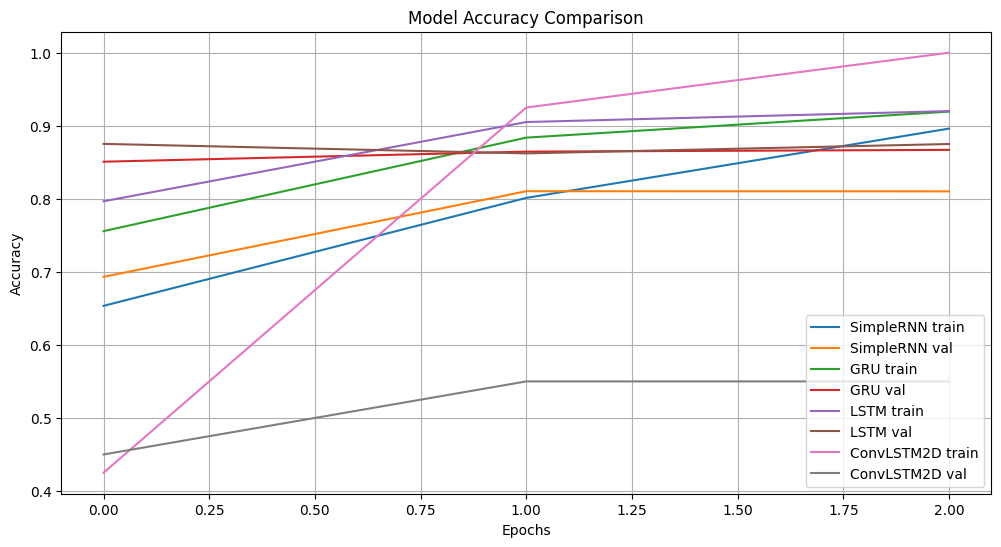

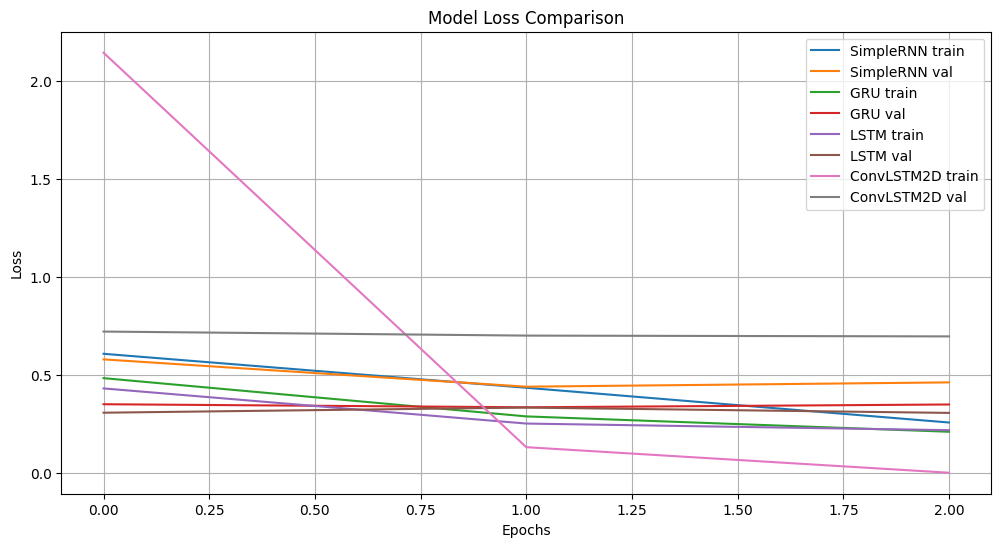

In [14]:
def plot_results(histories, metric='accuracy'):
    plt.figure(figsize=(12, 6))
    for name, (score, hist) in histories.items():
        plt.plot(hist[metric], label=f'{name} train')
        plt.plot(hist[f'val_{metric}'], label=f'{name} val')
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results(results, metric='accuracy')
plot_results(results, metric='loss')


###Evaluation Scores

In [15]:
for name, (score, _) in results.items():
    print(f"{name}: Test Loss = {score[0]:.4f}, Test Accuracy = {score[1]*100:.2f}%")

SimpleRNN: Test Loss = 0.4538, Test Accuracy = 81.07%
GRU: Test Loss = 0.3572, Test Accuracy = 86.37%
LSTM: Test Loss = 0.3175, Test Accuracy = 87.17%
ConvLSTM2D: Test Loss = 0.6872, Test Accuracy = 55.00%


###Conclusion

| Model      | Use Case                  | Pros                            | Cons                         |
| ---------- | ------------------------- | ------------------------------- | ---------------------------- |
| SimpleRNN  | Basic time sequences      | Fast                            | Poor at long-term memory     |
| GRU        | NLP, Time-series          | Faster than LSTM, fewer params  | Less expressive than LSTM    |
| LSTM       | NLP, Speech, Seq2Seq      | Captures long-term dependencies | Slower training              |
| ConvLSTM2D | Video & spatial sequences | Captures spatio-temporal data   | Needs 5D input, more compute |




###[Problem 2] (Advanced assignment) Comparison between multiple data sets
Please experiment with other datasets: Reuters Newswire Topics Classification

### 1. **Imports & Dataset Loading**

In [16]:
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### 2. **Data Preprocessing**

In [17]:
max_words = 10000   # Vocabulary size
maxlen = 200        # Cut news articles after 200 words
batch_size = 64
epochs = 5

# Load the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=46)
y_test = to_categorical(y_test, num_classes=46)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Model Architectures (RNN Variants)

Each model will use an Embedding layer followed by a recurrent layer and a Dense output.

#### Base Model Function

In [18]:
def build_rnn_model(rnn_type='SimpleRNN'):
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=maxlen))
    if rnn_type == 'SimpleRNN':
        model.add(SimpleRNN(64))
    elif rnn_type == 'GRU':
        model.add(GRU(64))
    elif rnn_type == 'LSTM':
        model.add(LSTM(64))
    model.add(Dense(46, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Training the Models

In [19]:
histories = {}
scores = {}

for rnn_type in ['SimpleRNN', 'GRU', 'LSTM']:
    print(f'\nTraining {rnn_type}...')
    model = build_rnn_model(rnn_type)
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)
    score = model.evaluate(x_test, y_test, verbose=0)
    histories[rnn_type] = history.history
    scores[rnn_type] = score


Training SimpleRNN...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.3009 - loss: 2.8809 - val_accuracy: 0.4480 - val_loss: 2.2088
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3808 - loss: 2.3902 - val_accuracy: 0.3912 - val_loss: 2.2252
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.4678 - loss: 2.1054 - val_accuracy: 0.3912 - val_loss: 2.1513
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.5054 - loss: 1.8710 - val_accuracy: 0.4296 - val_loss: 2.1827
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.6296 - loss: 1.5017 - val_accuracy: 0.4129 - val_loss: 2.2452

Training GRU...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.3511 - loss: 2.9744 - val_accuracy: 0.4040 - val_loss: 1.9808
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - accuracy: 0.4559 - loss: 1.9217 - val_accuracy: 0.5164 - val_loss: 1.7924
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.5602 - loss: 1.6679 - val_accuracy: 0.5548 - val_loss: 1.7153
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 43s 208ms/step - accuracy: 0.5924 - loss: 1.5922 - val_accuracy: 0.5526 - val_loss: 1.7142
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.6097 - loss: 1.5048 - val_accuracy: 0.5654 - val_loss: 1.6976

Training LSTM...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.2809 - loss: 3.0067 - val_accuracy: 0.4914 - val_loss: 2.1650
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.5018 - loss: 2.0581 - val_accuracy: 0.4886 - val_loss: 2.1813
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.5204 - loss: 1.9179 - val_accuracy: 0.5392 - val_loss: 1.9011
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.5603 - loss: 1.7357 - val_accuracy: 0.5965 - val_loss: 1.6417
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.6105 - loss: 1.5645 - val_accuracy: 0.5832 - val_loss: 1.6253


### Plot Comparison Charts

#### Accuracy Comparison

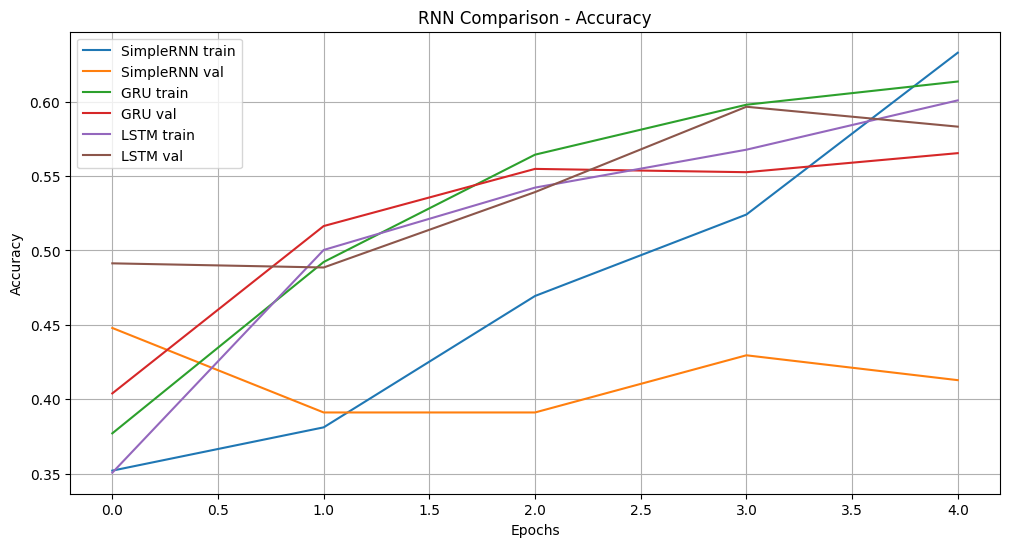

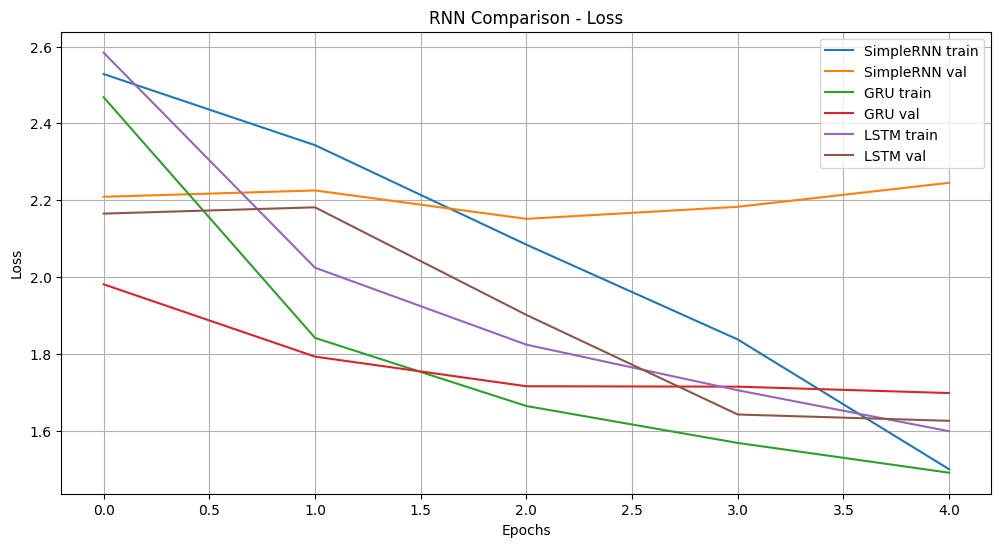

In [20]:
def plot_metric(metric):
    plt.figure(figsize=(12, 6))
    for name, hist in histories.items():
        plt.plot(hist[metric], label=f'{name} train')
        plt.plot(hist[f'val_{metric}'], label=f'{name} val')
    plt.title(f'RNN Comparison - {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric('accuracy')
plot_metric('loss')

### Print Final Evaluation Scores

In [21]:
print("Final Evaluation on Test Set:\n")
for name, score in scores.items():
    print(f"{name}: Test Loss = {score[0]:.4f}, Test Accuracy = {score[1]*100:.2f}%")

Final Evaluation on Test Set:

SimpleRNN: Test Loss = 2.2313, Test Accuracy = 43.14%
GRU: Test Loss = 1.7336, Test Accuracy = 56.99%
LSTM: Test Loss = 1.6739, Test Accuracy = 57.66%


### Expected Insights

| Model     | Pros                       | Expected Behavior (Reuters)              |
| --------- | -------------------------- | ---------------------------------------- |
| SimpleRNN | Fastest, low memory        | Lower accuracy, struggles with context   |
| GRU       | Balanced speed vs accuracy | Good accuracy, faster training than LSTM |
| LSTM      | Best at long dependencies  | Best accuracy, slower training           |


###ConvLSTM2D with Climate Data


In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import ConvLSTM2D, BatchNormalization, Conv3D
from sklearn.preprocessing import StandardScaler

In [29]:
# Loading data

df = pd.read_csv('/content/jena_climate_2009_2016.csv')
print("Loaded dataset. Shape:", df.shape)


# Load CSV
df = pd.read_csv('jena_climate_2009_2016.csv')

# Use only a few features for simplicity
features = ['T (degC)', 'p (mbar)', 'rh (%)']
data = df[features].values

# Normalize features
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Use past 72 timesteps (12 hours), predict next timestep
timesteps = 72
step = 6  # Predict every hour
samples = []
targets = []

for i in range(0, len(data) - timesteps - step, step):
    x = data[i:i+timesteps]
    y = data[i+timesteps]  # next time step
    samples.append(x)
    targets.append(y)

samples = np.array(samples)
targets = np.array(targets)


Loaded dataset. Shape: (265747, 15)


In [30]:
# Reshape for ConvLSTM2D
# Convert to shape: [samples, timesteps, height, width, channels]
samples = samples.reshape((samples.shape[0], timesteps, 1, len(features), 1))

In [31]:
# Train/Test Split
split = int(0.8 * len(samples))
x_train, x_test = samples[:split], samples[split:]
y_train, y_test = targets[:split], targets[split:]

In [40]:
# Build ConvLSTM2D
model = Sequential()
model.add(ConvLSTM2D(filters=16, # Reduced filters
                     kernel_size=(1, 2), # Reduced kernel size
                     activation='relu',
                     input_shape=(timesteps, 1, len(features), 1),
                     padding='same',
                     return_sequences=False))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(len(features), activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_8 (ConvLSTM2D)      │ (None, 1, 3, 16)       │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 3, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,451 (9.57 KB)

 Trainable params: 2,419 (9.45 KB)

 Non-trainable params: 32 (128.00 B)

In [41]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - loss: 0.2613 - val_loss: 0.0200
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - loss: 0.0137 - val_loss: 0.0083
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step - loss: 0.0051 - val_loss: 0.0029


277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0022
Test Loss (MSE): 0.0024


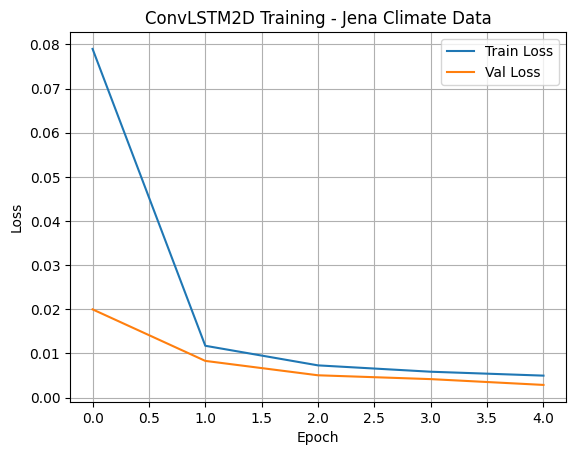

In [43]:
# Evaluate and Visualising

loss = model.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}')

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("ConvLSTM2D Training - Jena Climate Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Summary of All 4 Models

| Model      | Task Type           | Input Shape                               | Strength                         |
| ---------- | ------------------- | ----------------------------------------- | -------------------------------- |
| SimpleRNN  | Text Classification | \[samples, timesteps]                     | Lightweight, fast                |
| GRU        | Text Classification | \[samples, timesteps]                     | Better memory retention          |
| LSTM       | Text Classification | \[samples, timesteps]                     | Best with long dependencies      |
| ConvLSTM2D | Climate Forecasting | \[samples, time, height, width, channels] | Spatiotemporal patterns, 3D data |


###[Question 3] Explanation of other classes

An explanation of the **additional Keras RNN-related classes**, including their purpose and when (or if) you would actually use them:

---

## 1. **`RNN` (Base RNN wrapper)**

### 🔹 What it is:

A **generic RNN wrapper** class in Keras that can take any "cell" as an argument (e.g., `SimpleRNNCell`, `LSTMCell`, etc.) and turn it into a full RNN layer.

### 🔹 Use Case:

Use this if you want full control over the RNN's internal structure, such as:

* Custom RNNs
* Combining multiple cells (e.g., stacked RNNs with different cell types)

```python
from keras.layers import RNN, LSTMCell
cell = LSTMCell(units=32)
layer = RNN(cell)
```

### Practical?

Yes, for **advanced use cases** and research. Otherwise, use `LSTM`, `GRU`, etc.

---

##  2. **`SimpleRNNCell`**

### 🔹 What it is:

The **individual building block** of a `SimpleRNN`. You need to wrap it in `RNN` to use it.

### 🔹 Use Case:

Used when you want **fine-grained control** over the state or to **stack** multiple cells manually.

```python
from keras.layers import SimpleRNNCell, RNN
cell = SimpleRNNCell(units=16)
rnn = RNN(cell)
```

### Practical?

Sometimes, yes—for custom recurrent architectures or state manipulation.

---

##  3. **`GRUCell`**

Same concept as `SimpleRNNCell`, but for a **GRU unit**.

### 🔹 Use Case:

Use inside the `RNN` wrapper when you want:

* Manual stacking
* Access to state
* Custom loop logic

###  Practical?

Yes, for research or advanced model customization.

---

##  4. **`LSTMCell`**

Analogous to `GRUCell`, but for **LSTM** logic (has both hidden and cell states).

### 🔹 Use Case:

* When you want to **stack** or customize LSTM layers at the cell level
* Custom behavior per timestep

### Practical?

Yes, for experimentation or low-level customization.

---

## 5. **`StackedRNNCells`**

### 🔹 What it is:

A class that allows you to **stack multiple RNN cells manually**, and then pass them into a single `RNN` layer.

### 🔹 Use Case:

Instead of using `return_sequences=True` + `LSTM(...)` layers, you can manually control multiple cells like this:

```python
from keras.layers import StackedRNNCells, RNN, LSTMCell
stacked_cells = StackedRNNCells([LSTMCell(64), LSTMCell(32)])
rnn = RNN(stacked_cells)
```

### Practical?

Rarely—Keras already supports stacking RNN layers directly, which is simpler. But useful if you're mixing cell types or doing research.

---

## 6. **`CuDNNGRU`** (Deprecated)

### 🔹 What it is:

A version of `GRU` that was optimized for **NVIDIA GPUs using cuDNN**.

### 🔹 Status:

**NOTE**: Deprecated as of TensorFlow 2.x — unified GRU/LSTM layers now automatically use cuDNN when possible.

### Practical?

**No longer needed**. Use `GRU`, and TensorFlow will use GPU acceleration under the hood.

---

## 7. **`CuDNNLSTM`** (Deprecated)

### 🔹 What it is:

Same as above, but for LSTM.

###  Practical?

No. Deprecated. Use `LSTM` and you’ll still get GPU acceleration if available.

---

##  Summary Table

| Class             | Type          | Use Case                                 | Practical? |
| ----------------- | ------------- | ---------------------------------------- | ---------- |
| `RNN`             | Wrapper       | Custom loops or stacking low-level cells | ✅ Advanced |
| `SimpleRNNCell`   | Cell          | Manual control inside RNN                | ✅ Rare     |
| `GRUCell`         | Cell          | Fine-grained GRU control                 | ✅ Rare     |
| `LSTMCell`        | Cell          | Fine-grained LSTM control                | ✅ Rare     |
| `StackedRNNCells` | Cell stack    | Custom stacking of multiple RNN cells    | ⚠️ Rare    |
| `CuDNNGRU`        | GPU-optimized | Fast GRU on GPU (deprecated)             | ❌ No       |
| `CuDNNLSTM`       | GPU-optimized | Fast LSTM on GPU (deprecated)            | ❌ No       |

---

